# TP 2.2 Grisanov's theorem

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [24]:
S0 = 100
K = 150
r = 0.02 
sigma = 0.4
T = 2  #years
mean = 0
std = 1

In [25]:
#simulating B.M using the forward simulation from the TP2 

N = 100  

def brownianMotion(N=N, T=T):
    delta_T = (T / N)
    Z = np.random.normal(mean, std, size=(N + 1))
    W = np.zeros(N + 1)
    W[0] = Z[0] * np.sqrt(delta_T)
    for j in range(1, N + 1):
        W[j] = W[j-1] + np.sqrt(delta_T) * Z[j] 
    return W
    


In [26]:
#simulating ST

def S(S0=S0, r=r, sigma=sigma, T=T):
    WT = brownianMotion(N, T)[-1]
    ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * WT)
    return ST 

In [27]:
#Monte carlo for delta0 using P : 

M = 1000 
ST_samples = np.array([ S() for i in range(M) ])
deltaP_samples = np.where(ST_samples >= K, 1, 0)
est_delta0 = 1 / M * np.sum(deltaP_samples)

print("Sample size M = %d" %(M))       
print("estimated delta0 = %1.3f " %(est_delta0))

Sample size M = 1000
estimated delta0 = 0.175 


In [28]:
#simulating ST and Z
def S_Z(theta, S0=S0, r=r, sigma=sigma, T=T):
    BT_theta = brownianMotion(N, T)[-1]
    ST = S0 * np.exp((r - sigma ** 2 / 2 + sigma * theta) * T + sigma * BT_theta)
    Z = np.exp(theta * BT_theta + 1 / 2 * theta ** 2 * T)
    return ST, Z

In [29]:
#Monte carlo for delta0 using Q : 
theta = 1.5
M = 1000 
def est_delta(theta=theta):
    deltaQ_samples = np.zeros(M)
    for i in range(M):
        ST, Z = S_Z(theta)
        ind_ST = 1 if ST >= K else 0
        deltaQ_samples[i] = (1 / Z) * ind_ST
    
    return 1 / M * np.sum(deltaQ_samples)

est_delta0 = est_delta()

print("Sample size M = %d" %(M)) 
print("theta = %1.1f" %(theta))     
print("estimated delta0 = %1.3f " %(est_delta0)) 

Sample size M = 1000
theta = 1.5
estimated delta0 = 0.171 


In [30]:
#true value of delta0

x = 1 / (sigma * np.sqrt(T)) * (np.log(K / S0) - (r - sigma ** 2 / 2) * T) 
delta0 = 1 - norm.cdf(x)

print("delta0 = %1.4f " %(delta0)) 

delta0 = 0.1765 


In [31]:
X = np.arange(-3, 3, 6 / 50 )
Y = np.array([est_delta(theta)  for theta in X ])

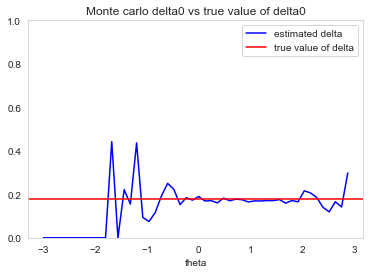

In [32]:
plt.plot(X, Y, color='b', label = 'estimated delta')
plt.axhline(delta0, color="r", label="true value of delta")
plt.title('Monte carlo delta0 vs true value of delta0')
plt.xlabel('theta')
plt.legend(loc = 'best')
plt.ylim((0,1)) 
plt.grid()

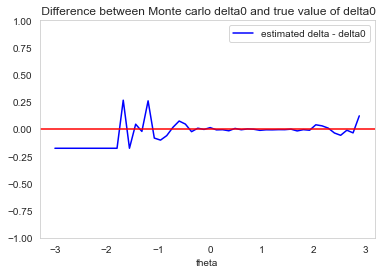

In [33]:
plt.plot(X, Y - delta0, color='b', label = 'estimated delta - delta0')
plt.title(' Difference between Monte carlo delta0 and true value of delta0')
plt.axhline(0, color="r")
plt.xlabel('theta')
plt.legend(loc = 'best')
plt.ylim((-1,1)) 
plt.grid()

In [34]:
def Variance_theta(theta, S0=S0, r=r, sigma=sigma, T=T):
    deltaQ_samples = np.zeros(M)
    est_mean_squared = np.zeros(M)
    for i in range(M):
        ST, Z = S_Z(theta)
        ind_ST = 1 if ST >= K else 0
        deltaQ_samples[i] = (1 / Z) * ind_ST
        est_mean_squared[i] = (1 / Z ** 2) * ind_ST
    return 1 / M * np.sum(est_mean_squared) - (1 / M * np.sum(deltaQ_samples)) ** 2


In [35]:
Y = np.array([Variance_theta(theta)  for theta in X ])

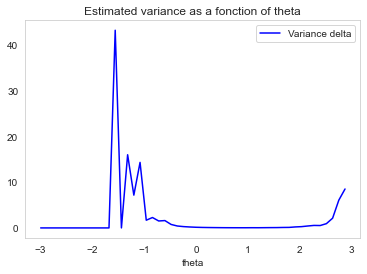

In [36]:
plt.plot(X, Y, color='b', label = 'Variance delta')
plt.title('Estimated variance as a fonction of theta')
plt.xlabel('theta')
plt.legend(loc = 'best')
plt.grid()

In [37]:
demi_largeur = 1.96 * np.sqrt(Y / M)

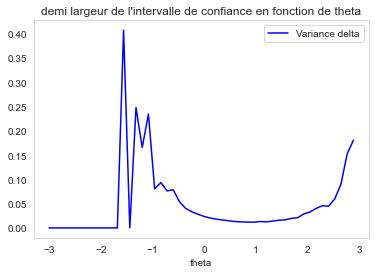

In [38]:
plt.plot(X, demi_largeur, color='b', label = 'Variance delta')
plt.title('demi largeur de l\'intervalle de confiance en fonction de theta' )
plt.xlabel('theta')
plt.legend(loc = 'best')
plt.grid()